In [1]:
import numpy as np
import xarray as xr
import cf_xarray
import interpax
from xgcm import Grid
import matplotlib.pyplot as plt

In [2]:
import jax.numpy as jnp
import jax
import functools

In [3]:
ds = xr.open_mfdataset("../data/*_woa.nc").transpose(
    "x_c", "x_f", "y_c", "y_f", "z_c", "z_f", ...
)
ds

<xarray.Dataset> Size: 476MB
Dimensions:          (x_f: 360, y_c: 180, z_c: 102, x_c: 360, y_f: 180, z_f: 102)
Coordinates: (12/17)
    lat              (y_c) float32 720B dask.array<chunksize=(180,), meta=np.ndarray>
    depth            (z_c) float32 408B dask.array<chunksize=(102,), meta=np.ndarray>
    lon              (x_c) float32 1kB dask.array<chunksize=(360,), meta=np.ndarray>
    lon_right        (x_f) float32 1kB dask.array<chunksize=(360,), meta=np.ndarray>
    lat_right        (y_f) float32 720B dask.array<chunksize=(180,), meta=np.ndarray>
  * x_c              (x_c) int64 3kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    ...               ...
    e2               float32 4B 1.11e+05
    e1vf             (y_f) float32 720B dask.array<chunksize=(180,), meta=np.ndarray>
    e3t              (z_c) float32 408B dask.array<chunksize=(102,), meta=np.ndarray>
    depth_right      (z_f) float32 408B dask.array<chunksize=(102,), meta=np.ndarray>
  * z_f              (z_f) int64 816B 0 1 2 3 4 5 6 7 ... 95 96 97 98 99 100 101
    e3w              (z_f) float32 408B dask.array<chunksize=(102,), meta=np.ndarray>
Data variables:
    ex               (x_f, y_c, z_c) float64 53MB dask.array<chunksize=(360, 180, 102), meta=np.ndarray>
    ey               (x_c, y_f, z_c) float64 53MB dask.array<chunksize=(360, 180, 102), meta=np.ndarray>
    grad_h_z_U       (x_f, y_c, z_c) float64 53MB dask.array<chunksize=(360, 180, 102), meta=np.ndarray>
    grad_h_z_V       (x_c, y_f, z_c) float64 53MB dask.array<chunksize=(360, 180, 102), meta=np.ndarray>
    ey_neutralocean  (x_c, y_f, z_c) float64 53MB dask.array<chunksize=(360, 180, 102), meta=np.ndarray>
    ex_neutralocean  (x_f, y_c, z_c) float64 53MB dask.array<chunksize=(360, 180, 102), meta=np.ndarray>
    t_an             (x_c, y_c, z_c) float32 26MB dask.array<chunksize=(180, 90, 51), meta=np.ndarray>
    s_an             (x_c, y_c, z_c) float32 26MB dask.array<chunksize=(180, 90, 51), meta=np.ndarray>
    p                (y_c, z_c) float64 147kB dask.array<chunksize=(180, 102), meta=np.ndarray>
    SA               (x_c, y_c, z_c) float64 53MB dask.array<chunksize=(360, 180, 102), meta=np.ndarray>
    CT               (x_c, y_c, z_c) float64 53MB dask.array<chunksize=(360, 180, 102), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2023 : sea_water_pract...
    summary:                         Climatological mean salinity for the glo...
    references:                      Reagan, J.R., D. Seidov, Z. Wang, D. Duk...
    institution:                     NOAA National Centers for Environmental ...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2024-01-28 
    date_modified:                   2024-01-28

In [4]:
grid = Grid(ds, periodic=["X"], metrics={"X":["e1tu","e1vf"], "Y":["e2"], "Z":["e3t","e3w"]})
grid

<xgcm.Grid>
Z Axis (not periodic, boundary=None):
  * center   z_c --> right
  * right    z_f --> center
Y Axis (not periodic, boundary=None):
  * center   y_c --> right
  * right    y_f --> center
X Axis (periodic, boundary=None):
  * center   x_c --> right
  * right    x_f --> center

In [5]:
# We want a function that takes ex, ey, depth of the surface as input
# 1 function for ex, takes depth at U point
# 1 function for ey, takes depth at V point

In [6]:
def interp_slope_1d(depth_of_slope, slopes_x, depth_U):
    """
    interpolate the *slopes_x*, located at *depth_of_slope*, to *depth_U*

    slopes_x and depth_of_slope are 1d
    depth_U is a scalar
    """
    pass

In [7]:
xp = ds.depth.values
fp = ds.ex.isel(x_f=40, y_c=31).values
x = 130

In [8]:
fp

array([-4.26633724e-09, -5.33289486e-09, -6.49140584e-09, -5.29808284e-09,
       -5.56190886e-09, -4.96997430e-09, -6.24642079e-09, -1.26520438e-08,
       -1.89005248e-08, -2.12727330e-08, -2.71573855e-08, -3.60155188e-08,
       -4.77187136e-08, -5.86807169e-08, -6.56073361e-08, -6.88927686e-08,
       -7.52638456e-08, -8.60539708e-08, -9.05695876e-08, -8.90183471e-08,
       -8.74514826e-08, -4.39991503e-08,  1.29579194e-08,  7.00118345e-08,
        8.29925787e-08,  7.45738847e-08,  7.35391515e-08,  6.99016945e-08,
        6.61033899e-08,  5.93486859e-08,  5.33572409e-08,  4.75876629e-08,
        4.10846416e-08,  3.99264939e-08,  3.60166897e-08,  3.02507147e-08,
        3.49603373e-08,  3.00415223e-08,  2.46636556e-08,  1.60533642e-08,
        1.29783192e-08,  1.30083734e-08,  9.95513932e-09,  1.03632074e-08,
        1.23760827e-08,  6.91742565e-09,  4.71264654e-09,  2.45339828e-09,
        6.99952889e-10,  2.49263565e-09,  4.26883307e-10, -3.55067715e-09,
       -4.32178402e-09, -

In [9]:
jx = jnp.asarray(x)
jxp = jnp.asarray(xp)
jfp = jnp.asarray(fp)

In [10]:
%%timeit
jnp.interp(x, xp, fp)

186 μs ± 4.18 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
%%timeit
jnp.interp(jx, jxp, jfp)

132 μs ± 1.51 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%%timeit
np.interp(x, xp, fp)

1.03 μs ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [13]:
%%time
f = interpax.Interpolator1D(jxp, jfp, method="linear")

CPU times: user 20.7 ms, sys: 0 ns, total: 20.7 ms
Wall time: 27 ms


In [14]:
%%timeit
f(x)

137 μs ± 2.79 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [15]:
# test with jit
@jax.jit
def jnp_interp_jit(x, xp, fp):
    return jnp.interp(x, xp, fp)

In [16]:
%%time
jnp_interp_jit(jx, jxp, jfp)

CPU times: user 79.9 ms, sys: 3.45 ms, total: 83.3 ms
Wall time: 79 ms


Array(-3.2607737e-08, dtype=float32)

In [17]:
%%timeit
jnp_interp_jit(jx, jxp, jfp)

64.3 μs ± 193 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [18]:
# 1d interp, but at every (x,y) grid point

@functools.partial(jax.vmap, in_axes=0)
@functools.partial(jax.vmap, in_axes=0)
def interp_1d_at_every_point(x, xp, fp):
    return jnp.interp(x, xp, fp)


interp_1d_at_every_point_interpax = interpax.Interpolator3D(
    ds.x_c,
    ds.y_c,
    ds.depth.values,
    ds.ex.values,
    method="linear"
)

In [19]:
k = 10

In [20]:
x=jnp.asarray((ds.ex.isel(z_c=0)*0+ds.depth.isel(z_c=k)).values)
xp=jnp.asarray(ds.depth.broadcast_like(ds.ex).values)
fp=jnp.asarray(ds.ex.values)

In [21]:
%%timeit
interp_1d_at_every_point(
    x=(ds.ex.isel(z_c=0)*0+ds.depth.isel(z_c=k)).values,
    xp=ds.depth.broadcast_like(ds.ex).values,
    fp=ds.ex.values
)

73 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
interp_1d_at_every_point(
    x,
    xp,
    fp
)

587 μs ± 3.78 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [23]:
interp_1d_at_every_point_interpax(
    180,90,15
)

Array(1.4260593e-07, dtype=float32)

In [24]:
x = jnp.asarray(ds.x_f.broadcast_like(ds.ex.isel(z_c=k)).values.flatten())
y = jnp.asarray(ds.y_c.broadcast_like(ds.ex.isel(z_c=k)).values.flatten())
z = jnp.asarray(ds.depth.broadcast_like(ds.ex).isel(z_c=k).values.flatten())

In [25]:
%%timeit
interp_1d_at_every_point_interpax(
    ds.x_f.broadcast_like(ds.ex.isel(z_c=k)).values.flatten(),
    ds.y_c.broadcast_like(ds.ex.isel(z_c=k)).values.flatten(),
    ds.depth.broadcast_like(ds.ex).isel(z_c=k).values.flatten()
)

11.2 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%%timeit
interp_1d_at_every_point_interpax(
    x,y,z
)

546 μs ± 32.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [27]:

out = interp_1d_at_every_point(
    x=(ds.ex.isel(z_c=0)*0+ds.depth.isel(z_c=k)).values,
    xp=ds.depth.broadcast_like(ds.ex).values,
    fp=ds.ex.values
)

In [28]:
from neutralocean.surface import potential_surf, anomaly_surf, omega_surf
import neutralocean.grid.rectilinear

In [29]:
# we now verify that the interpolated slopes on omega surfaces are small

In [30]:
ni, nj, nk = ds.cf["sea_water_conservative_temperature"].shape
neutralocean_grid = neutralocean.grid.rectilinear.build_grid(
    dims=(ni, nj),
    periodic=(True, False),
    dxC=ds.e1tu,
    dyC=ds.e2,
    dxG=ds.e1vf,
    dyG=ds.e2
)

In [31]:
# Select pinning cast
# When these are used for 'pin_cast' and 'pin_p' or 'p_init', the following
# surfaces will intersect cast (i0,j0) at a depth of z0.
i0, j0 = 180, 110
z0 = 1500.0




i0, j0 = 100, 40


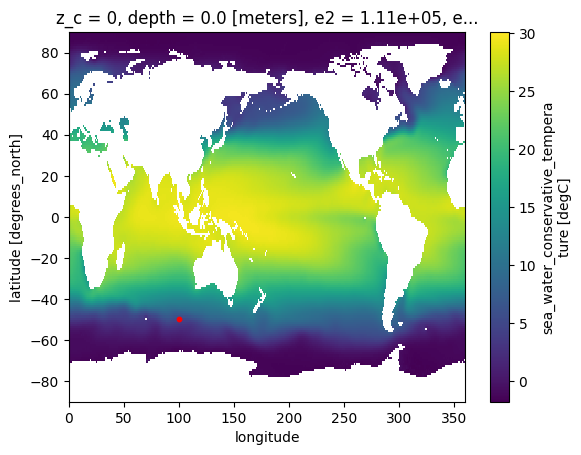

In [32]:
ds.cf["sea_water_conservative_temperature"].isel(z_c=0).plot(x="lon", y="lat", center=False)
plt.scatter(ds.lon.isel(x_c=i0), ds.lat.isel(y_c=j0), s=10, c="r")

In [33]:
args = {}
args["grid"] = neutralocean_grid
args["pin_cast"] = (i0, j0)
#args["p_ml"] = {"bottle_index": 1, "ref_p": 0.0}  # see `mixed_layer` for info

In [34]:
%%time
s, t, z, d = potential_surf(
    ds.cf["sea_water_absolute_salinity"],
    ds.cf["sea_water_conservative_temperature"],
    ds.depth.broadcast_like(ds.cf["sea_water_absolute_salinity"]),
    **args,
    vert_dim=-1,
    #isoval=1027.5,
    ref=1500.,
    pin_p=1500.
)

potential done |       36031 wet casts | RMS(ϵ) = 4.96480981e-14  | 1.521 sec
CPU times: user 5.17 s, sys: 111 ms, total: 5.29 s
Wall time: 5.28 s


In [35]:
print(d)

{'ref': 1500.0, 'isoval': 0.0009664818802055861, 'timer': 1.520721435546875, 'e_RMS': np.float64(4.9648098144312135e-14), 'e_MAV': np.float64(9.650989783124902e-15), 'n_wet': np.int64(36031)}


In [36]:
out = interp_1d_at_every_point(
    x=z.values,
    xp=ds.depth.broadcast_like(ds.ex).values,
    fp=ds.ex.values
)

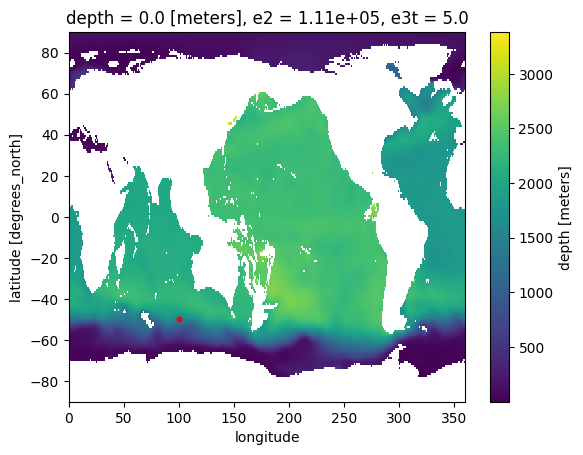

In [37]:
z.plot(x="lon", y="lat")
plt.scatter(ds.lon.isel(x_c=i0), ds.lat.isel(y_c=j0), s=10, c="r")

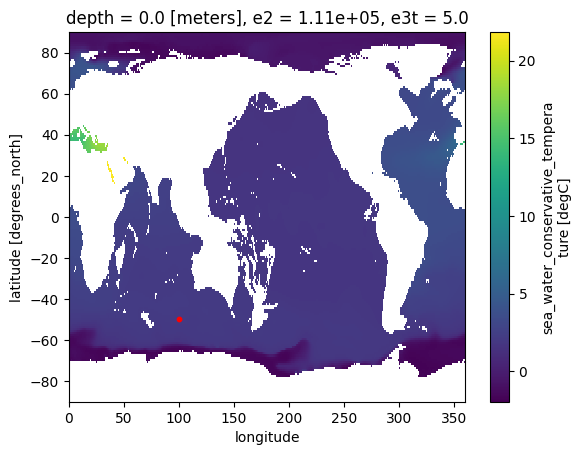

In [38]:
t.plot(x="lon", y="lat", center=False)
plt.scatter(ds.lon.isel(x_c=i0), ds.lat.isel(y_c=j0), s=10, c="r")

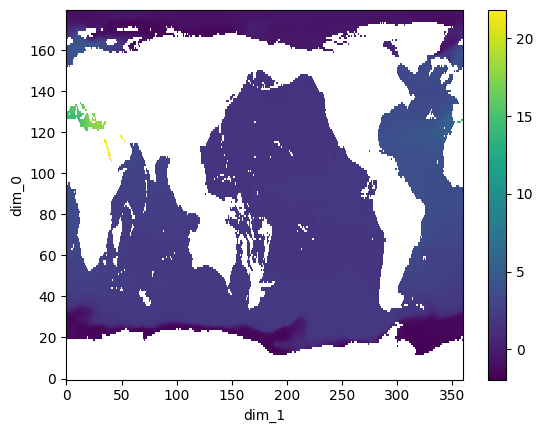

In [39]:
out = interp_1d_at_every_point(
    x=z.values,
    xp=ds.depth.broadcast_like(ds.ex).values,
    fp=ds.cf["sea_water_conservative_temperature"].values
)

xr.DataArray(np.array(out).T).plot(center=False)

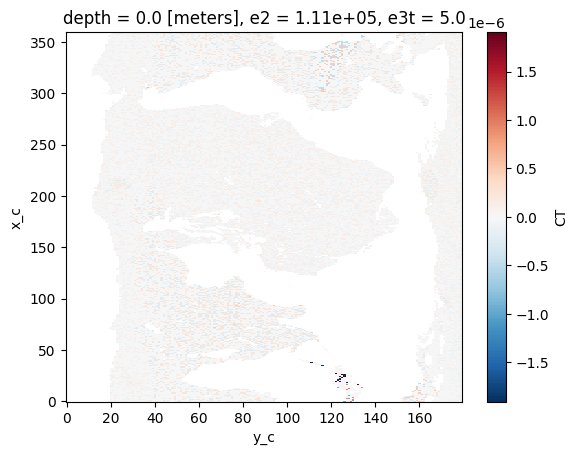

In [40]:
(out - t).plot()

In [41]:
%%time
s_omega, t_omega, z_omega, d = omega_surf(
    ds.cf["sea_water_absolute_salinity"],
    ds.cf["sea_water_conservative_temperature"],
    ds.depth.broadcast_like(ds.cf["sea_water_absolute_salinity"]),
    **args,
    vert_dim=-1,
    p_init=z,
    ITER_MAX=50
)

iter |    MAV(ϕ)     |    RMS(Δp)      | # wet casts (# new) |     RMS(ϵ)     | time (s)
   0 |                                 |       36031         | 4.96480981e-14 | 0.009
   1 | 6.81154532e-06 | 1.62903591e+02 |       35121 (   38) | 3.66056526e-15 | 2.638
   2 | 1.18506294e-05 | 1.08862709e+02 |       35478 (  749) | 3.93563562e-15 | 0.178
   3 | 1.07173469e-05 | 1.91047831e+01 |       35724 (  648) | 3.08747923e-15 | 0.163
   4 | 1.10615822e-05 | 7.39938007e+00 |       35729 (  370) | 3.09241397e-15 | 0.162
   5 | 1.06619738e-05 | 7.69901332e+00 |       35732 (  369) | 3.03054085e-15 | 0.166
   6 | 6.51874934e-08 | 2.82671564e+02 |       35041 (    0) | 4.43868121e-15 | 0.277
   7 | 1.13006501e-08 | 3.35504111e+01 |       35020 (    0) | 1.87033603e-15 | 0.158
   8 | 2.86451001e-09 | 7.13397359e+00 |       35017 (    0) | 7.69579457e-16 | 0.155
   9 | 5.79349870e-10 | 1.16391054e+00 |       35017 (    0) | 7.40656841e-16 | 0.147
  10 | 1.16429878e-10 | 2.15254935e-01 |       3501

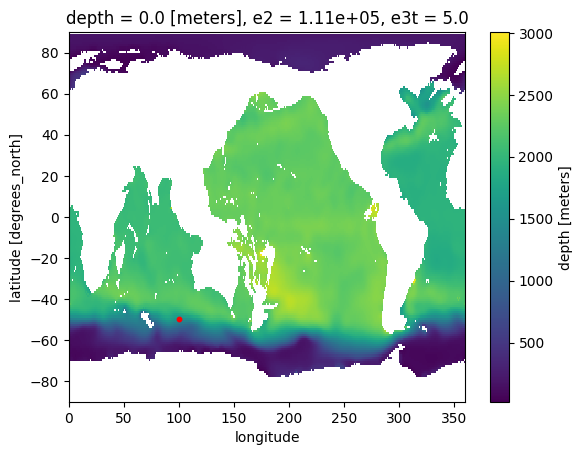

In [42]:
z_omega.plot(x="lon", y="lat")
plt.scatter(ds.lon.isel(x_c=i0), ds.lat.isel(y_c=j0), s=10, c="r")

In [43]:
# compute gradient of omega surface along x

/home/romain/.cache/pypoetry/virtualenvs/neutral-density-BeRXjZM7-py3.10/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


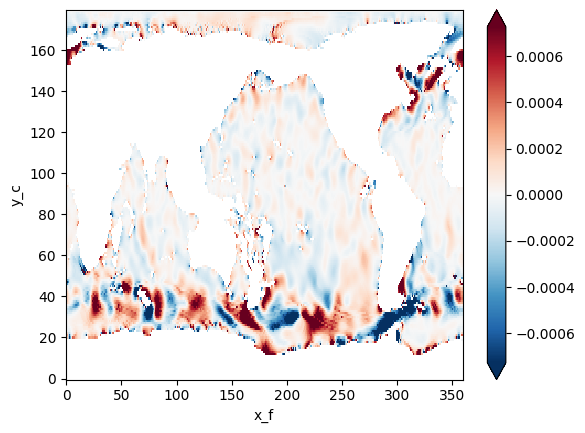

In [44]:
grid.derivative(z_omega, "X").plot(x="x_f", y="y_c", robust=True)

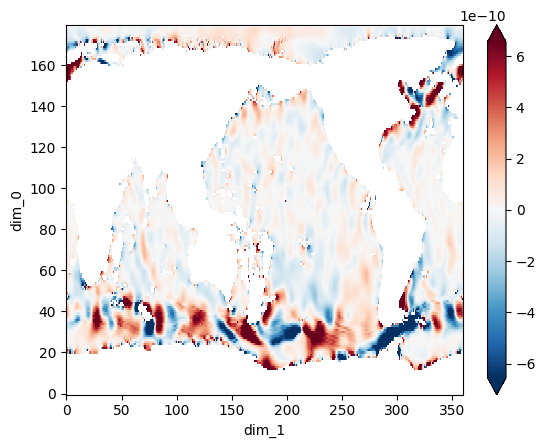

In [45]:
out = interp_1d_at_every_point(
    x=z_omega.values,
    xp=ds.depth.broadcast_like(ds.ex).values,
    fp=ds.grad_h_z_U.values
)

xr.DataArray(np.array(out).T).plot(robust=True)

/home/romain/.cache/pypoetry/virtualenvs/neutral-density-BeRXjZM7-py3.10/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


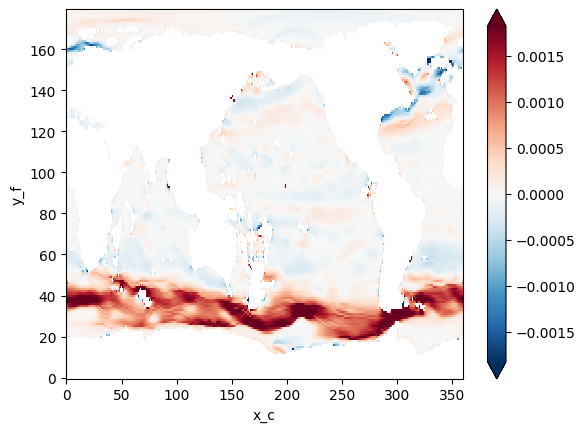

In [46]:
grid.derivative(z, "Y").plot(x="x_c", y="y_f", robust=True)

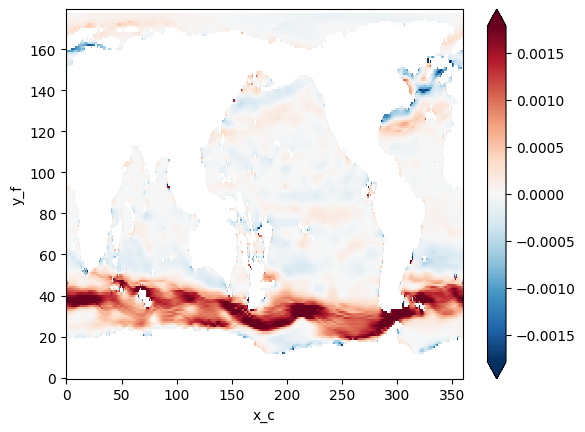

In [47]:
grid.derivative(z_omega, "Y").plot(x="x_c", y="y_f", robust=True)

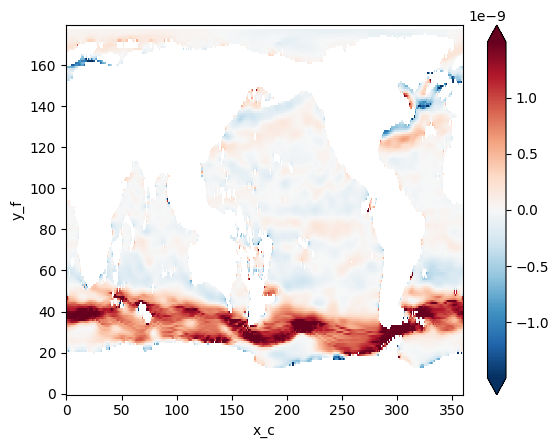

In [50]:
out = interp_1d_at_every_point(
    x=grid.interp(z_omega, "Y").values,
    xp=ds.depth.broadcast_like(ds.grad_h_z_V).values,
    fp=ds.grad_h_z_V.values
)

out = xr.DataArray(np.array(out), dims=("x_c", "y_f"))
out.plot(x="x_c", y="y_f", robust=True)

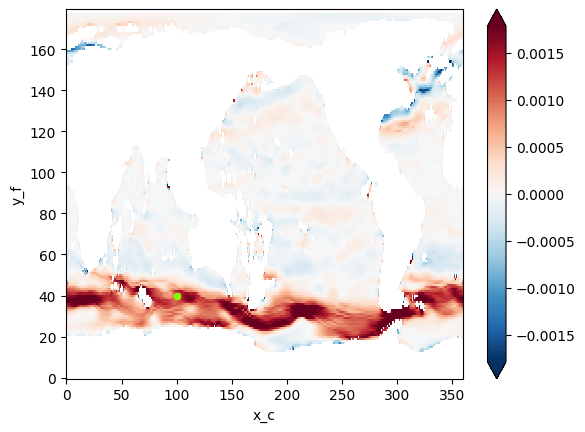

In [51]:
(grid.derivative(z_omega, "Y") - out).plot(x="x_c", y="y_f", robust=True)

plt.scatter([i0], [j0], s=20, c="chartreuse")